In [24]:
import sys
sys.path.append('/home/alysha/Downloads')
import sys
sys.path.append('/home/alysha/Downloads')

In [25]:
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
from scipy import signal

In [26]:
fly = flb.NetFly(1531,rootpath='/media/imager/FlyDataD/FlyDB/')
fly.open_signals()

In [27]:
%matplotlib inline

In [39]:
abf_sp = fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
spike_sig = np.array(fly.abf_electrode[start:stop])
i1_ca = fly.ca_camera_left_model_fits['b2']
## another way of extracting b1 activity
#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))
#F = np.percentile(F_,0.01)
#DF_F = (F_-F)/F
#b1_ca = DF_F



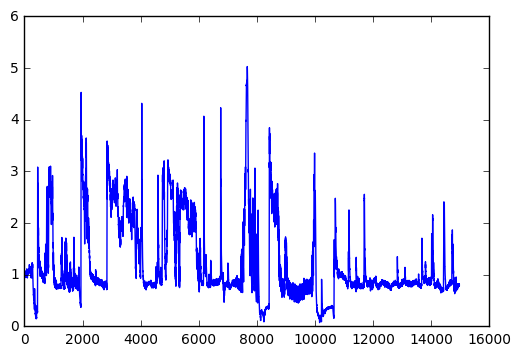

In [40]:
plt.plot(i1_ca)

In [41]:
#put the ca data into the abf timebase
resampled_i1_ca,resampled_t = signal.resample(i1_ca,len(ep_times),
                                              np.array(fly.ca_camera_left_times))


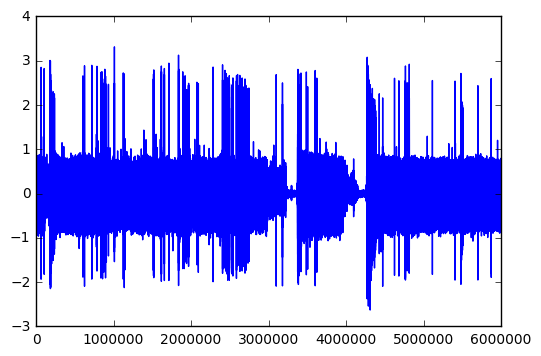

In [42]:
plt.plot(spike_sig*-1)
spike_sig = spike_sig*-1

In [43]:
#grab a spike pool
spike_idxs = util.idx_by_thresh(spike_sig,thresh = 2.5)
#filter out false positives here
#get_peaks
peak_idxs = [np.argmax(spike_sig[idx[0]-10:idx[-1]+10])+idx[0]-10 for idx in spike_idxs]

spike_idxs = spike_idxs[:-1]
peak_idxs = peak_idxs[:-1]

In [44]:
time_mtrx = np.array([ep_times[idx-50:idx+50] for idx in peak_idxs])


In [45]:
np.shape(fly.ca_camera_left)[0]

ca_camera_instances = np.arange(0, np.shape(fly.ca_camera_left)[0])

i1_firing_freq  = [] #firing frequency of i-1 during the ca_imaging fram
firing_instances = []
spike_total = 0
for i in range(len(ca_camera_instances)-1):
    spiking= 0
    for j in range(len(peak_idxs)):
        if peak_idxs[j] <= ((ca_camera_instances[i+1])*400) and peak_idxs[j] > (ca_camera_instances[i])*400:
            spiking = spiking + 1
            #print(spiking)
    spike_total = spike_total + spiking
    #print (spike_total)
    if spiking > 0:
        i1_firing_freq.append(spiking)
        firing_instances.append(ca_camera_instances[i])
    else:
        i1_firing_freq.append(0)

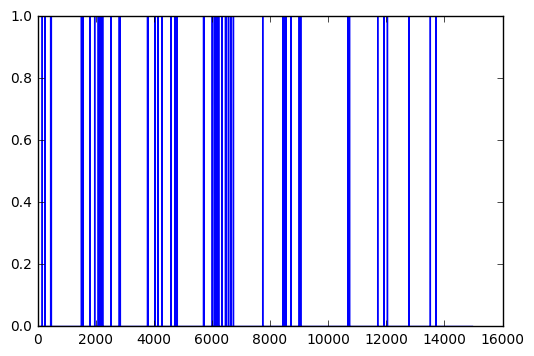

In [46]:
plt.plot(i1_firing_freq)

In [47]:
ca_camera_instances = np.arange(0, (np.shape(fly.ca_camera_left)[0]),1)
print (ca_camera_instances)

[    0     1     2 ..., 14963 14964 14965]


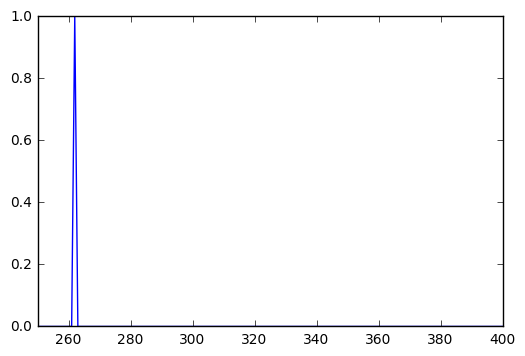

In [48]:
plt.plot(i1_firing_freq)
plt.gca().set_xbound(250,400)

In [49]:
product_img = np.array(i1_firing_freq)[:,None,None] * np.array(fly.ca_camera_left[:-1])

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


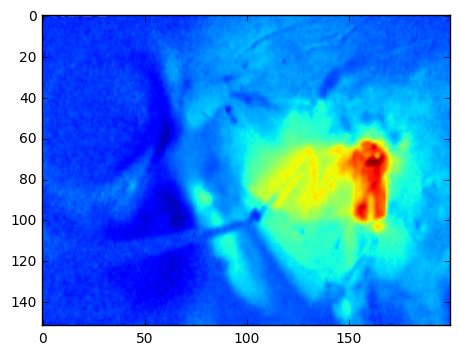

In [51]:
plt.imshow(np.sum(product_img,axis = 0)/np.mean(fly.ca_camera_left,axis = 0))
plt.savefig("1531_b2_cross_correlation.pdf")